In [59]:
#installations
!pip install yfinance

### Collection of data


---
 Here, we are going to collect stock market data of companies



In [60]:
#importation of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import date, timedelta

In [61]:
#defining the time period for the data
end = date.today().strftime("%Y-%m-%d")
start = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

- Here, the start date has been set to today and the end date is one year ago

In [62]:
# list of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

- The data collected is from the following indian companies
> - RELIANCE.NS
> - TCS.NS
> - INFY.NS
> - HDFCBANK.NS

In [63]:
data = yf.download(tickers = tickers, start = start, end = end, progress = True)
print(data.head())

[*********************100%%**********************]  4 of 4 completed

Price         Adj Close                                               Close  \
Ticker      HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS   
Date                                                                          
2023-08-14  1589.198853  1368.032959  2568.177979  3392.482178  1610.900024   
2023-08-16  1584.562012  1392.525879  2566.085449  3400.889648  1606.199951   
2023-08-17  1575.782104  1385.703247  2529.066162  3378.616455  1597.300049   
2023-08-18  1569.320190  1363.369873  2547.800049  3311.108154  1590.750000   
2023-08-21  1568.087036  1379.665771  2520.000000  3345.083496  1589.500000   

Price                                                     High               \
Ticker          INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS   
Date                                                                          
2023-08-14  1393.550049  2577.250000  3449.850098  1615.000000  1395.000000   
2023-08-16  1418.500000  2575.149902  3458.399902  

In [64]:
#resetting the index
data = data.reset_index()
data.head(3)

Price        Date    Adj Close                                         \
Ticker             HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0      2023-08-14  1589.198853  1368.032959  2568.177979  3392.482178   
1      2023-08-16  1584.562012  1392.525879  2566.085449  3400.889648   
2      2023-08-17  1575.782104  1385.703247  2529.066162  3378.616455   

Price         Close                                                High  ...  \
Ticker  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS  ...   
0       1610.900024  1393.550049  2577.250000  3449.850098  1615.000000  ...   
1       1606.199951  1418.500000  2575.149902  3458.399902  1609.650024  ...   
2       1597.300049  1411.550049  2538.000000  3435.750000  1609.900024  ...   

Price           Low                      Open                            \
Ticker  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS  RELIANCE.NS   
0       2525.000000  3411.000000  1611.000000  1371.849976  2539.000000   
1       2551.000000  3435.199951  1583.099976  1410.800049  2551.000000   
2       2532.850098  3413.199951  1597.599976  1420.000000  2567.100098   

Price                    Volume                                
Ticker       TCS.NS HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
0       3440.699951    15652205  4304135     4787906  1190425  
1       3450.000000    17068771  7735313     5101556  1328445  
2       3455.000000    26442020  5618346     6836872  1843241  

[3 rows x 25 columns]

- The index has been reset to allow the use of the *Date* column as a regular column in the DataFrame. Since the *Date* column was previously set as the index, and the `melt` function doesn't operate on index columns, resetting the index ensures that *Date* can be used as a standard column during the melt process.

In [65]:
# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])


- The DataFrame is being melted to transform it from a wide format to a long format. By using the `melt` function, each row in the resulting `data_melted` DataFrame will represent a unique combination of `Date`, `Ticker`, and attributes such as price or volume. The `id_vars=['Date']` parameter specifies that the `Date` column should remain unchanged, serving as an identifier. Meanwhile, the original wide-format columns are unpivoted into two new columns: `Attribute` (which holds the type of data, like 'Adj Close' or 'Volume') and `Ticker` (which holds the stock symbol). This restructuring makes the data easier to analyze and visualize in various contexts.

In [66]:
#pivot the melted data
data_pivoted = data_melted.pivot_table(index = ['Date', 'Ticker'], columns = 'Attribute', values='value', aggfunc='first')
data_pivoted.head()

Attribute                 Adj Close        Close         High          Low  \
Date       Ticker                                                            
2023-08-14 HDFCBANK.NS  1589.198853  1610.900024  1615.000000  1600.250000   
           INFY.NS      1368.032959  1393.550049  1395.000000  1365.599976   
           RELIANCE.NS  2568.177979  2577.250000  2582.300049  2525.000000   
           TCS.NS       3392.482178  3449.850098  3455.000000  3411.000000   
2023-08-16 HDFCBANK.NS  1584.562012  1606.199951  1609.650024  1581.300049   

Attribute                      Open      Volume  
Date       Ticker                                
2023-08-14 HDFCBANK.NS  1611.000000  15652205.0  
           INFY.NS      1371.849976   4304135.0  
           RELIANCE.NS  2539.000000   4787906.0  
           TCS.NS       3440.699951   1190425.0  
2023-08-16 HDFCBANK.NS  1583.099976  17068771.0

- The melted data is being pivoted to reorganize it into a more structured format. By using the `pivot_table` function, the *Date* and *Ticker* columns are set as the index of the new DataFrame, ensuring that each row represents a unique combination of these two values. The `Attribute` column, which previously held different types of data (like 'Adj Close', 'Volume', etc.), is used to create new columns, with each attribute type becoming its own column. The `values` parameter specifies that the corresponding values from the melted DataFrame will populate these new columns. The `aggfunc='first'` ensures that if there are multiple entries for the same combination of *Date* and *Ticker*, the first occurrence is used to fill the new table, resulting in a neatly organized DataFrame where each row contains all relevant data attributes for a specific date and stock ticker.

In [67]:
# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())

Attribute       Date       Ticker    Adj Close        Close         High  \
0         2023-08-14  HDFCBANK.NS  1589.198853  1610.900024  1615.000000   
1         2023-08-14      INFY.NS  1368.032959  1393.550049  1395.000000   
2         2023-08-14  RELIANCE.NS  2568.177979  2577.250000  2582.300049   
3         2023-08-14       TCS.NS  3392.482178  3449.850098  3455.000000   
4         2023-08-16  HDFCBANK.NS  1584.562012  1606.199951  1609.650024   

Attribute          Low         Open      Volume  
0          1600.250000  1611.000000  15652205.0  
1          1365.599976  1371.849976   4304135.0  
2          2525.000000  2539.000000   4787906.0  
3          3411.000000  3440.699951   1190425.0  
4          1581.300049  1583.099976  17068771.0  


- The DataFrame is being reset to turn the multi-index (Date and Ticker) into regular columns. This makes it easier to work with the data, as each row now has columns for Date, Ticker, and the various attributes (like 'Adj Close', 'Volume'). Resetting the index converts the hierarchical structure back into standard columns, simplifying data manipulation and analysis.

### EDA

In [68]:
#converting the date to date time
stock_data['Date']= pd.to_datetime(stock_data['Date'])

In [69]:
#setting the index as date
stock_data = stock_data.set_index('Date')
#resetting the index to remove date as an index
stock_data = stock_data.reset_index()

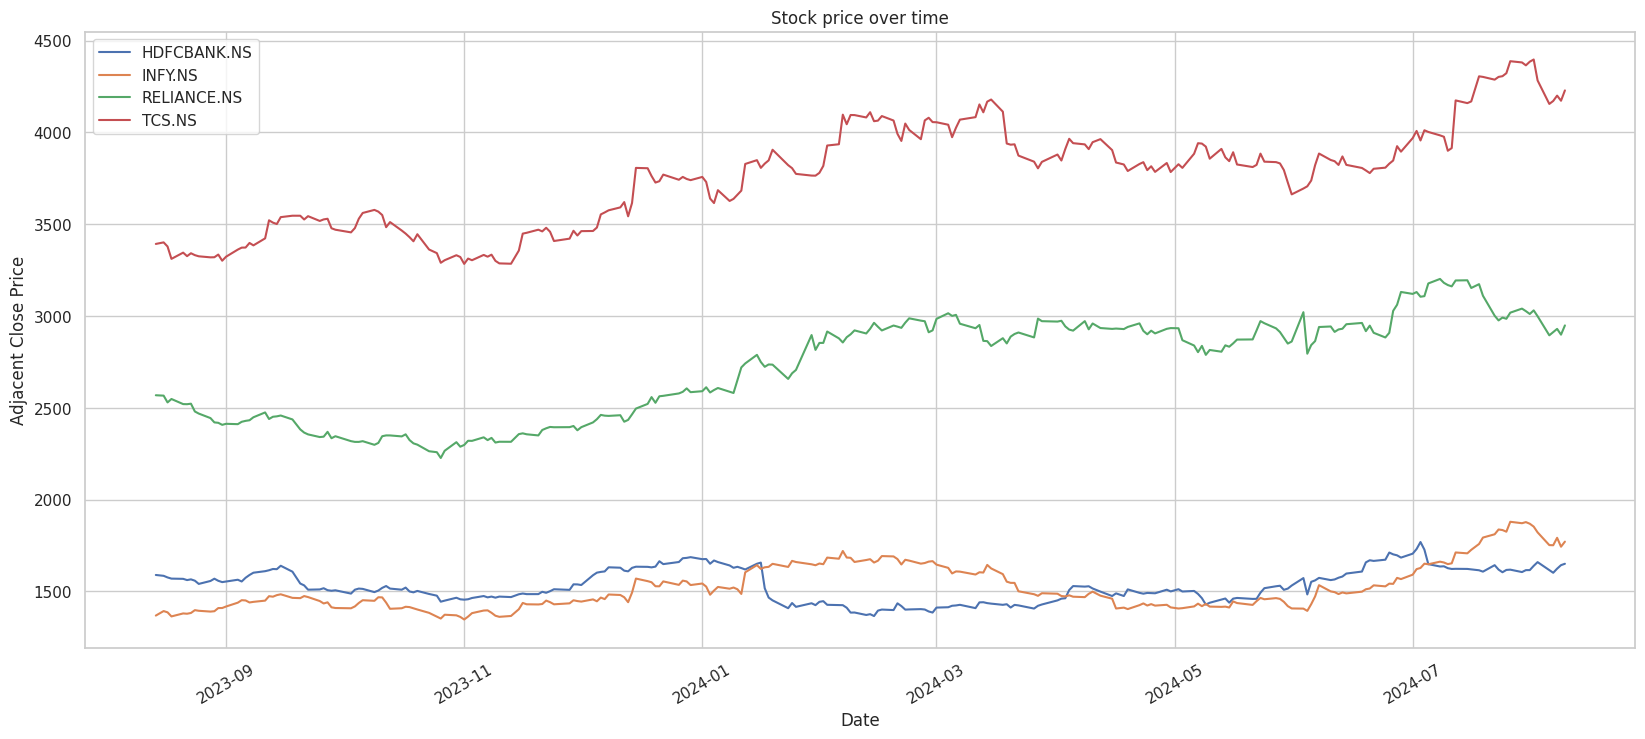

In [70]:
#plotting a lineplot
plt.figure(figsize = (20, 8))
sns.lineplot(data = stock_data, x = 'Date', y = 'Adj Close', hue = 'Ticker')
plt.title('Stock price over time')
plt.xlabel('Date')
plt.ylabel('Adjacent Close Price')
plt.legend(loc = 'upper left')
sns.set(style='darkgrid')
plt.xticks(rotation = 30)
plt.show()

- The graph illustrates the adjusted close prices for four stocks *(HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS)* from `August 2023` to `August 2024`. It reveals that **TCS** has the highest close prices, followed by **RELIANCE, INFY (Infosys)**, and **HDFCBANK**. Both **RELIANCE** and **TCS** demonstrate significant upward trends, indicating strong performance, while **HDFCBANK** and I**NFY** show more stability with comparatively smaller price fluctuations.

In [71]:
#calculating the moving averages over time to smooth out short-term flactuations

#setting the short_term and long_term moving averages
short_window = 50
long_window = 200

#setting the index to date
stock_data.set_index('Date', inplace=True)
#setting unique tickers
un_tickers = stock_data['Ticker'].unique()

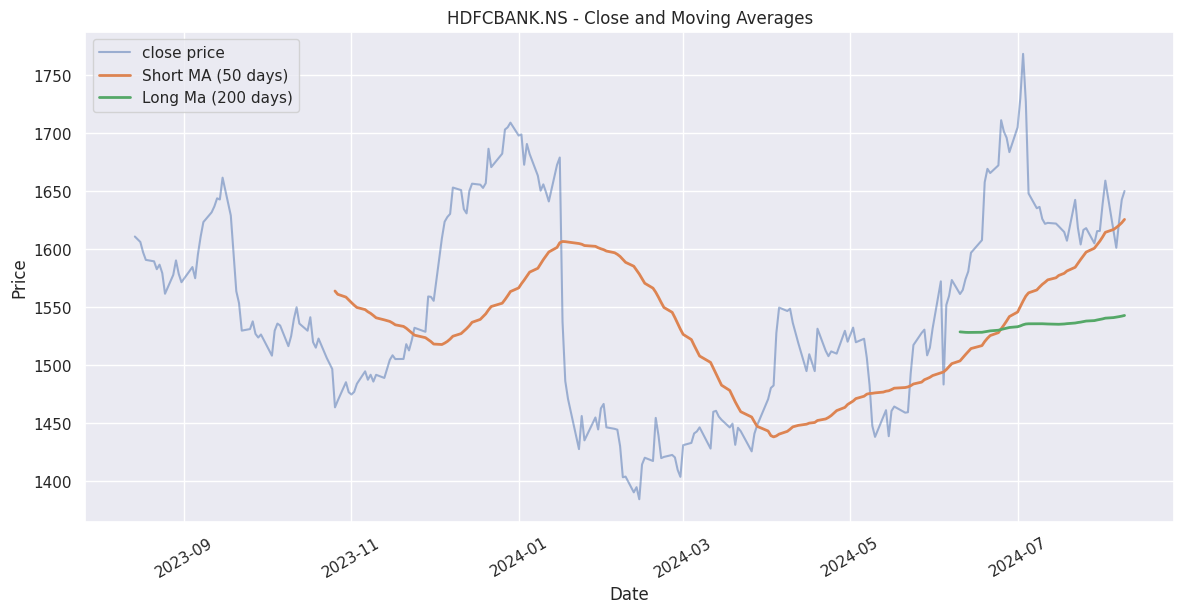

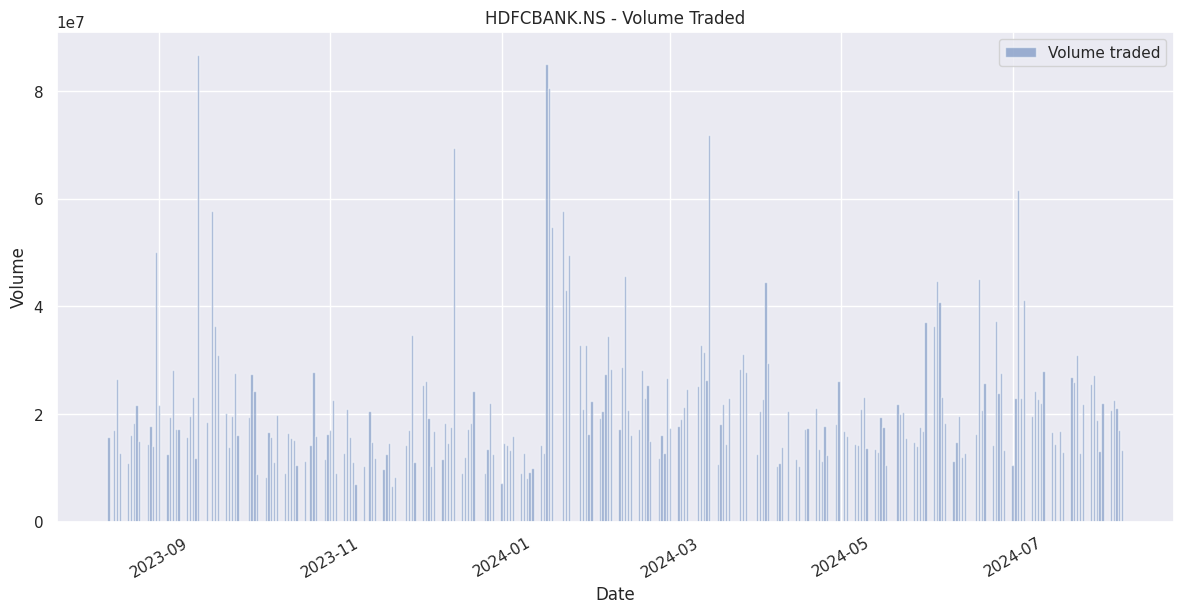

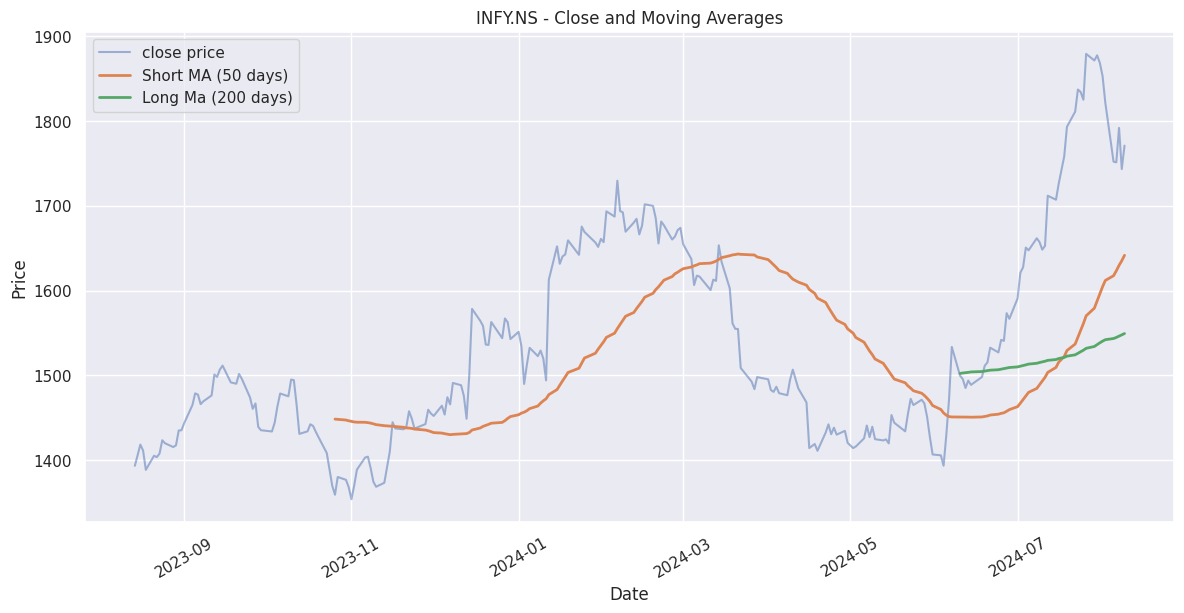

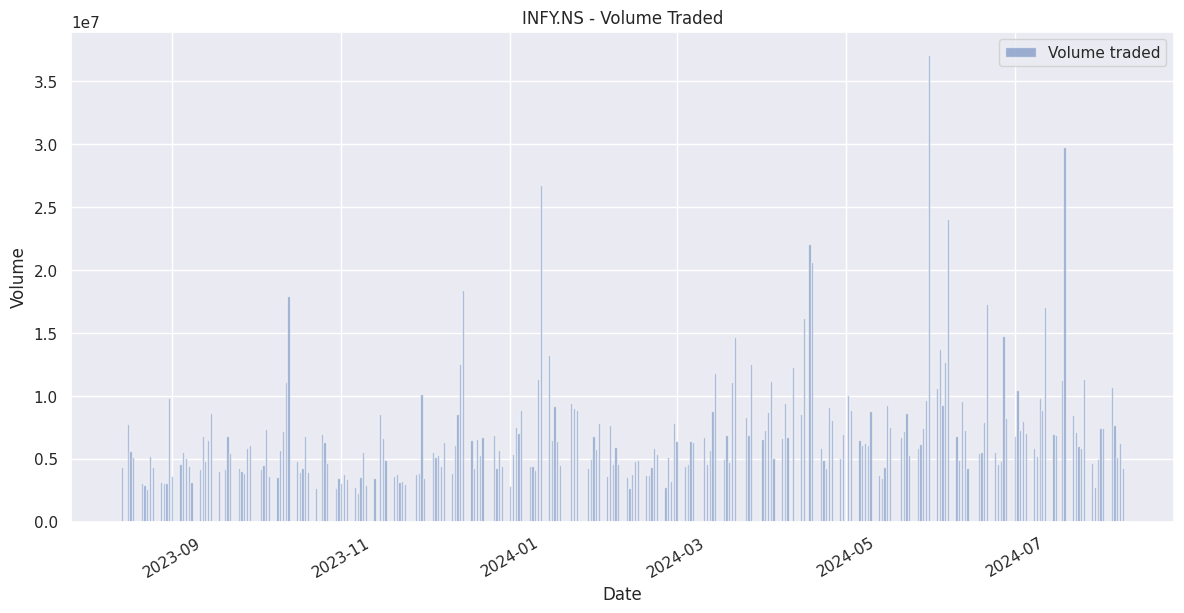

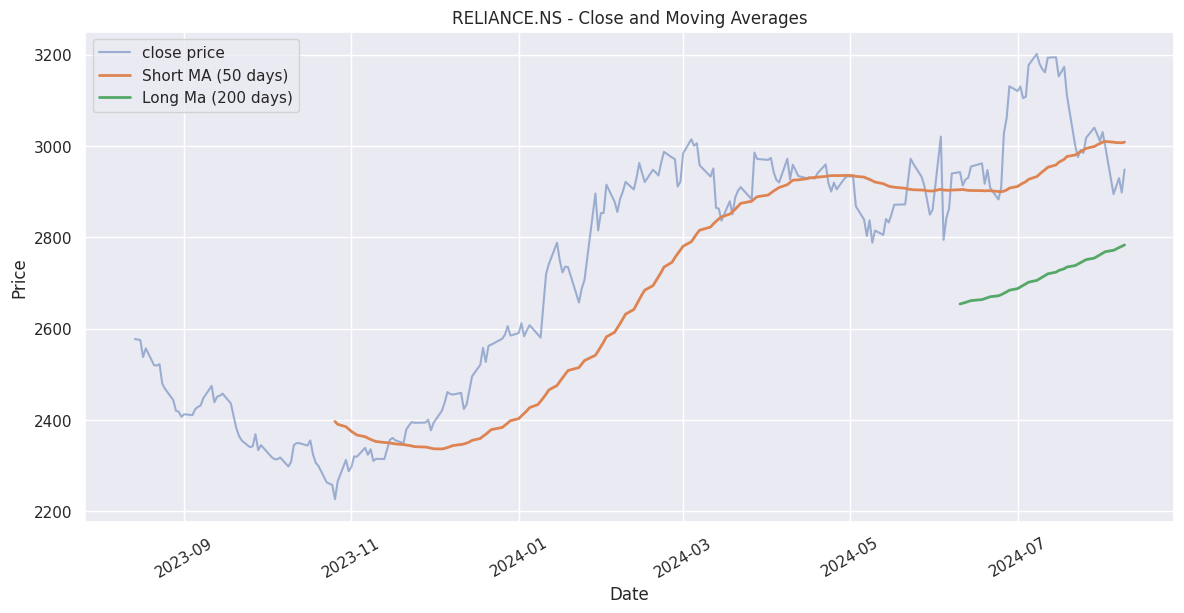

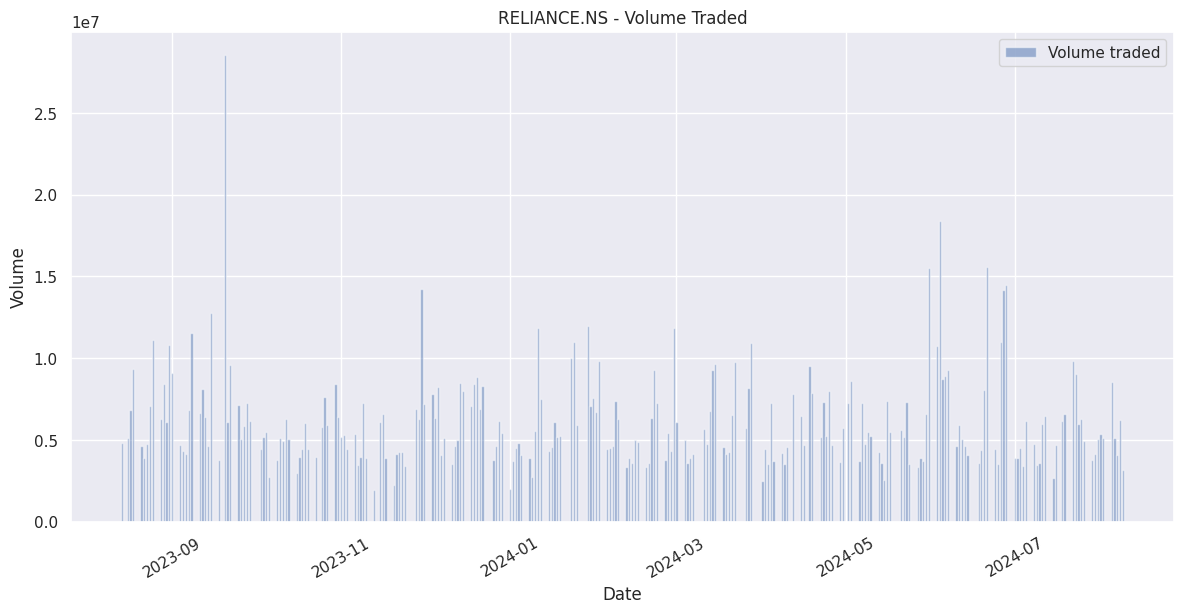

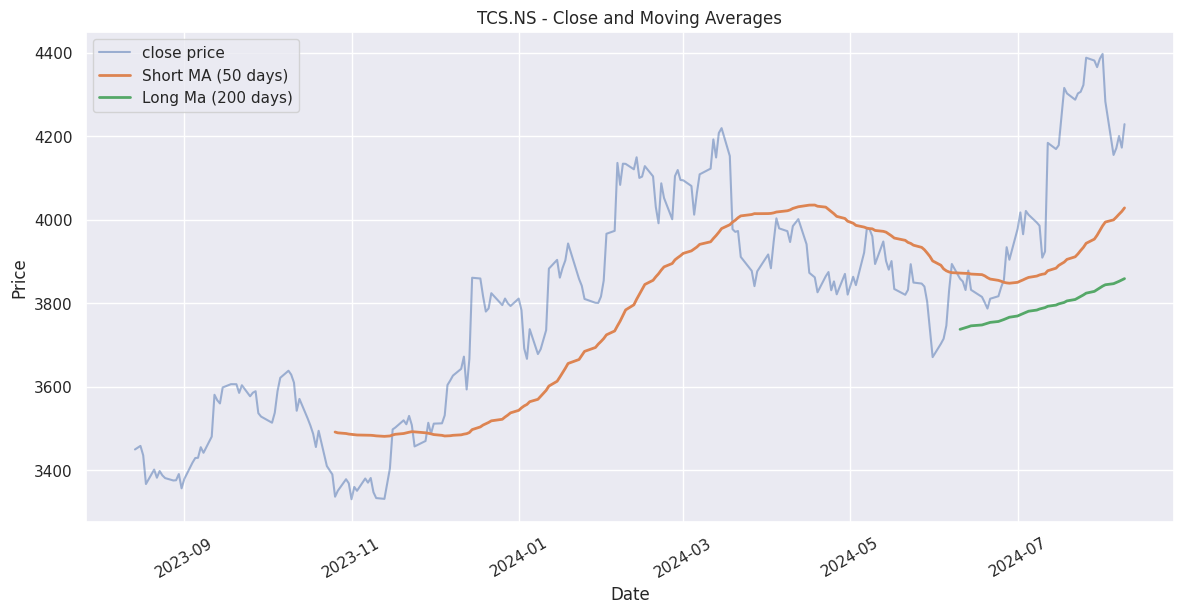

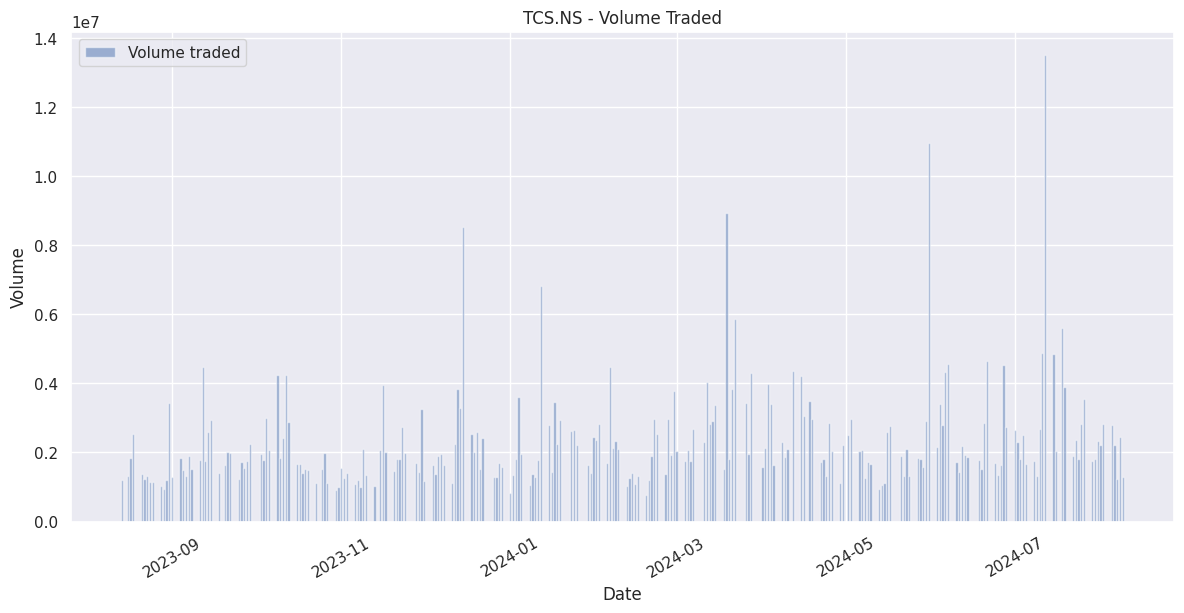

In [72]:
#looping through the dataframe, getting the unique ticker, calculating the moving averages and plotting the results
for ticker in un_tickers:
  ticker_df = stock_data[stock_data['Ticker']==ticker].copy()
  #calculating the rolling mean for short window
  ticker_df['Short_MA'] = ticker_df['Close'].rolling(window=short_window).mean()
  #calculating the rolling mean for long window
  ticker_df['Long_MA'] = ticker_df['Close'].rolling(window=long_window).mean()
  #plotting the data
  plt.figure(figsize=(12, 6))
  plt.plot(ticker_df.index, ticker_df['Close'], label = 'close price', alpha = 0.5)
  plt.plot(ticker_df.index, ticker_df['Short_MA'], label = f'Short MA ({short_window} days)', linewidth = 2)
  plt.plot(ticker_df.index, ticker_df['Long_MA'], label = f'Long Ma ({long_window} days)', linewidth = 2)
  plt.title(f'{ticker} - Close and Moving Averages')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  sns.set(style = 'darkgrid')
  plt.tight_layout()
  plt.xticks(rotation = 30)
  plt.show()

  #plotting the volume traded
  plt.figure(figsize=(12,6))
  plt.bar(ticker_df.index, ticker_df['Volume'], label= 'Volume traded', alpha = 0.5)
  plt.title(f'{ticker} - Volume Traded')
  plt.xlabel('Date')
  plt.ylabel('Volume')
  plt.legend()
  sns.set(style = 'darkgrid')
  plt.tight_layout()
  plt.xticks(rotation = 30)
  plt.show()

- For **HDFCBANK** and **INFY**, the prices initially decrease but later exhibit signs of recovery, as shown by the moving averages. In contrast, **RELIANCE** and **TCS** display a more steady upward trend in their close prices. The volume traded graphs reveal significant trading activity at various times, with notable spikes in trading volumes, especially for **HDFCBANK** and **RELIANCE** around early 2024. These observations are valuable for understanding price movements and trading patterns, which can help in making informed investment decisions.

In [73]:
#checking the daily returns for the stock data
stock_data['Daily_returns'] = stock_data.groupby('Ticker')['Close'].pct_change()

In [74]:
stock_data.head()

Attribute,Ticker,Adj Close,Close,High,Low,Open,Volume,Daily_returns
Date,,,,,,,,
2023-08-14,HDFCBANK.NS,1589.198853,1610.900024,1615.000000,1600.250000,1611.000000,15652205.0,NaN
2023-08-14,INFY.NS,1368.032959,1393.550049,1395.000000,1365.599976,1371.849976,4304135.0,NaN
2023-08-14,RELIANCE.NS,2568.177979,2577.250000,2582.300049,2525.000000,2539.000000,4787906.0,NaN
2023-08-14,TCS.NS,3392.482178,3449.850098,3455.000000,3411.000000,3440.699951,1190425.0,NaN
2023-08-16,HDFCBANK.NS,1584.562012,1606.199951,1609.650024,1581.300049,1583.099976,17068771.0,-0.002918


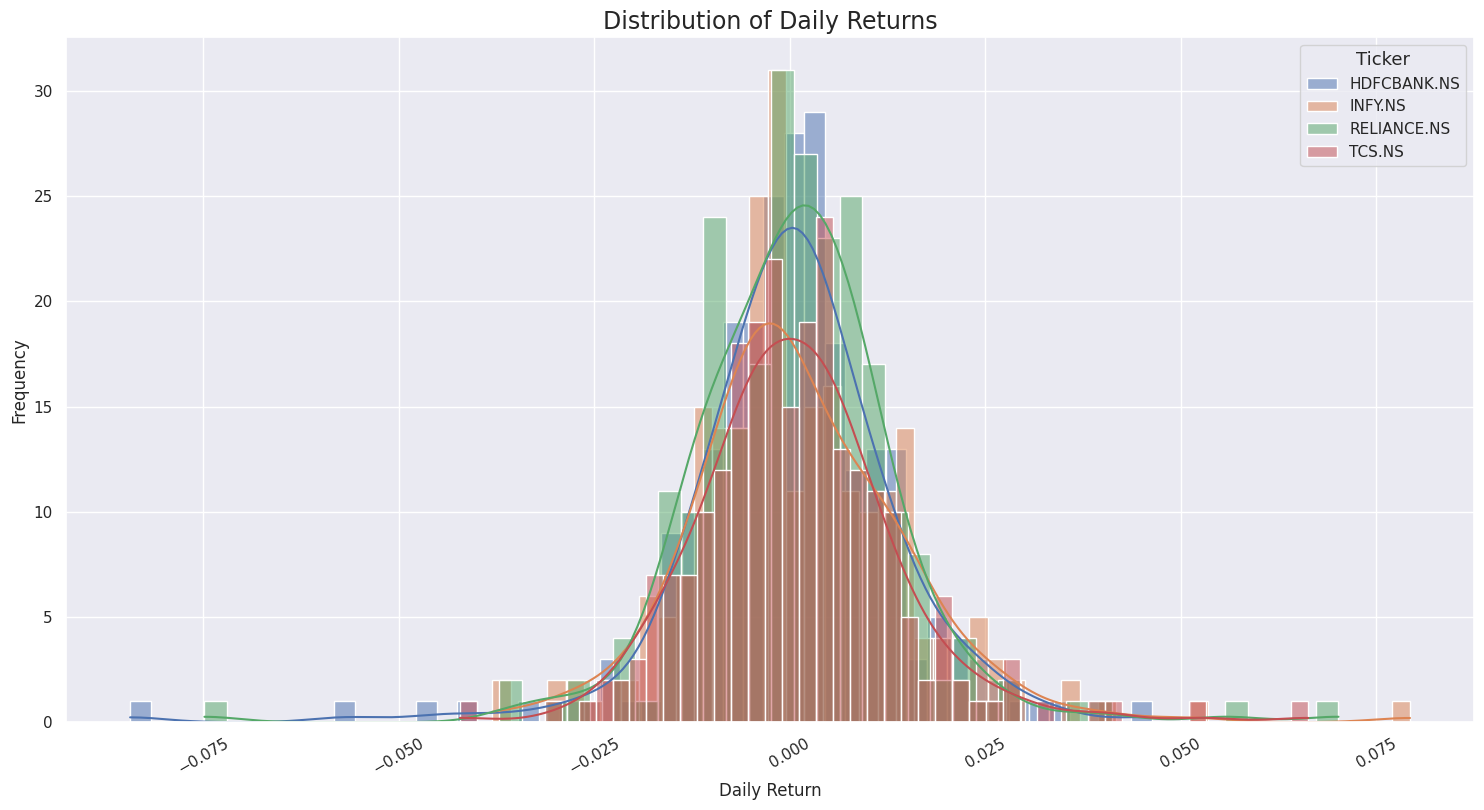

In [75]:
#plotting the data
plt.figure(figsize = (15, 8))
sns.set(style = 'darkgrid')
for ticker in un_tickers:
  ticker_df1= stock_data[stock_data['Ticker']==ticker]
  sns.histplot(ticker_df1['Daily_returns'].dropna(), bins = 50, kde = True, label= ticker, alpha = 0.5 )
plt.title('Distribution of Daily Returns', fontsize = 17)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation = 30)
plt.show()

- The distributions are roughly normal and centered around zero, indicating that most daily returns are close to the average return. However, there are tails on both sides, reflecting occasional significant gains or losses. **HDFCBANK** makes most losses of the four. **INFY** and **RELIANCE** show slightly wider distributions, suggesting higher volatility compared to **HDFCBANK** and **TCS.**

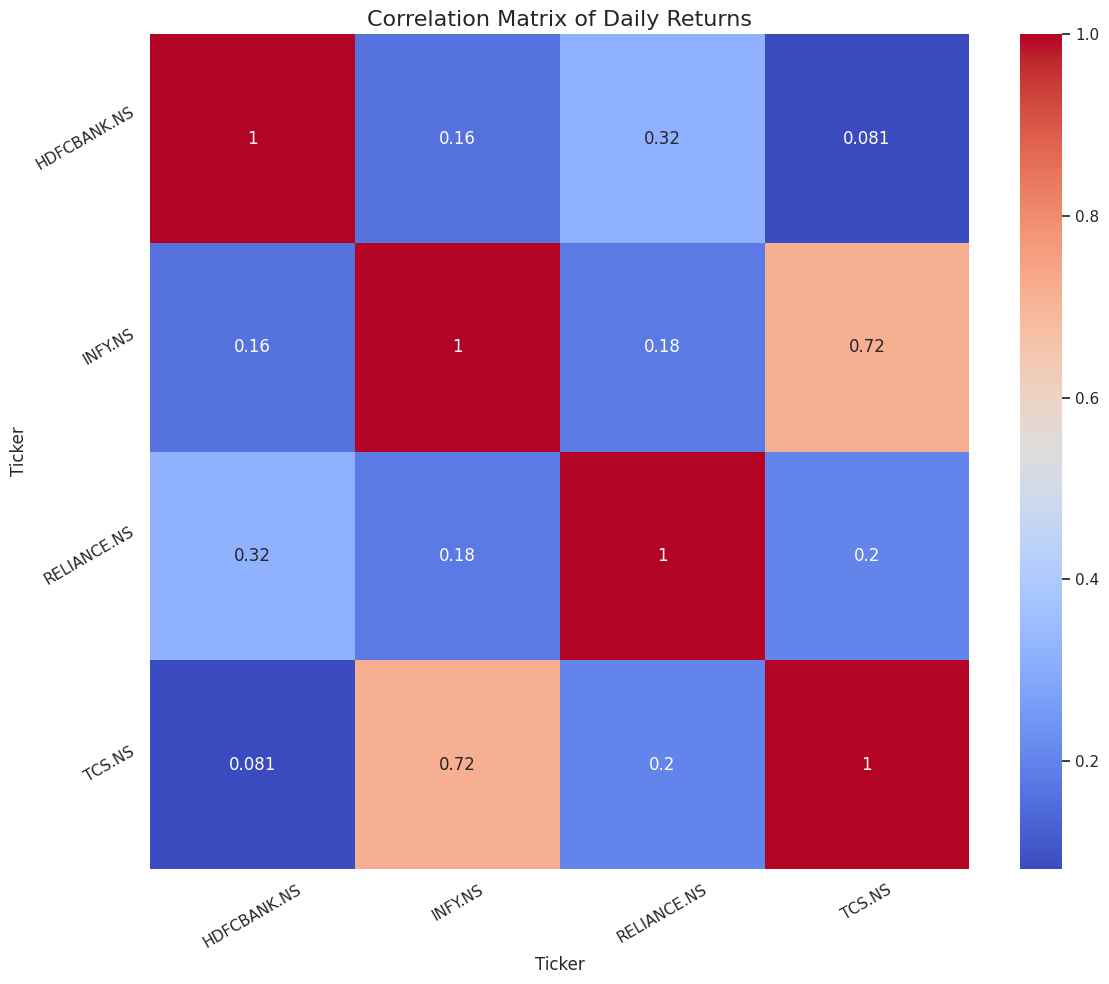

In [76]:
#calculating the correlation between the stocks
stock_pivot = stock_data.pivot_table(index = 'Date', columns = 'Ticker', values = 'Daily_returns')
correlation_matrix = stock_pivot.corr()

#plotting a heatmap of the correlation
plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.tight_layout()
plt.show()

- The correlations among the stocks reveal various relationships:
> - `INFY` and `TCS` have a high positive correlation of 0.71, indicating that they generally move in the same direction.
> - `HDFCBANK`shows a moderate positive correlation of 0.37 with `RELIANCE` but has low correlations of 0.17 with `INFY` and 0.10 with `TCS`.
> - `RELIANCE` also exhibits low correlations of 0.19 with `INFY` and 0.13 with `TCS`.

These diverse correlations suggest potential benefits of diversification, as combining stocks with lower correlations can help mitigate overall portfolio risk.



---

### Calculation of the returns and volatility of the stock

In [77]:
#calculating expected returns and volatility of the stock
expected_returns = stock_pivot.mean() * 252  # annualize the returns
volatility = stock_pivot.std() * np.sqrt(252)  # annualize the volatility

In [78]:
#creating a dataframe of the returns
stock_stats = pd.DataFrame(
    {
        'Expected_returns': expected_returns,
        'Volatility': volatility
    }
)
stock_stats

,Expected_returns,Volatility
Ticker,,
HDFCBANK.NS,0.048467,0.214852
INFY.NS,0.275126,0.222932
RELIANCE.NS,0.163642,0.214295
TCS.NS,0.233648,0.204665


- `RELIANCE` stands out with the highest expected return of **29.73%** and moderate volatility at **21.47%**, suggesting a high-reward investment with relatively higher risk.
- `INFY` and `TCS` also present strong expected returns of **21.38%** and **22.09%**, respectively, coupled with moderate volatility of **23.23%** and **19.69%**.
-In contrast, `HDFCBANK` offers the lowest expected return at **1.37%** along with moderate volatility of **20.69%**, making it the least attractive option in terms of risk-adjusted returns.

In [79]:
ticker_df.head()

Attribute,Ticker,Adj Close,Close,High,Low,Open,Volume,Short_MA,Long_MA
Date,,,,,,,,,
2023-08-14,TCS.NS,3392.482178,3449.850098,3455.000000,3411.000000,3440.699951,1190425.0,NaN,NaN
2023-08-16,TCS.NS,3400.889648,3458.399902,3466.000000,3435.199951,3450.000000,1328445.0,NaN,NaN
2023-08-17,TCS.NS,3378.616455,3435.750000,3460.800049,3413.199951,3455.000000,1843241.0,NaN,NaN
2023-08-18,TCS.NS,3311.108154,3367.100098,3410.000000,3356.500000,3410.000000,2526749.0,NaN,NaN
2023-08-21,TCS.NS,3345.083496,3401.649902,3409.750000,3372.000000,3375.000000,1375579.0,NaN,NaN
